# Blackfriday

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("C:/Users/USER/Desktop/imarticus/anaconda/anaconda/black_friday test.csv")
train = pd.read_csv("C:/Users/USER/Desktop/imarticus/anaconda/anaconda/black_friday train.csv")

In [3]:
data=pd.concat([test,train])

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [5]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490.0


In [6]:
data.shape

(783667, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

### there are missing values in the Product_Category_2,Product_Category_3, purchase columns

## Visualization

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


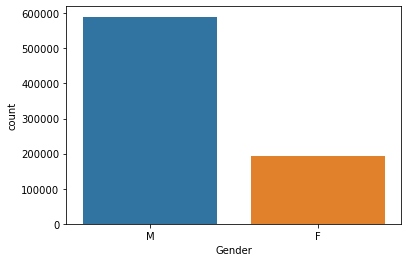

In [10]:
sns.countplot(data['Gender'])
plt.show()

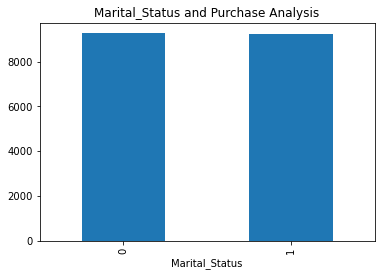

In [11]:
data.groupby("Marital_Status").mean()["Purchase"]
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


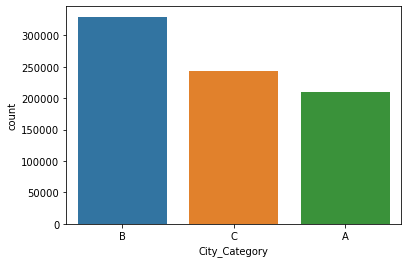

In [12]:
sns.countplot(data['City_Category'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


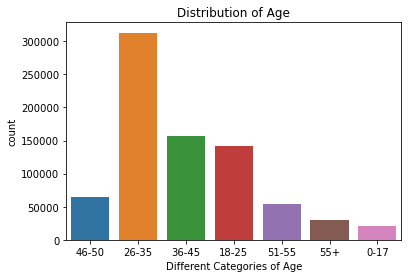

In [13]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

## Heat map

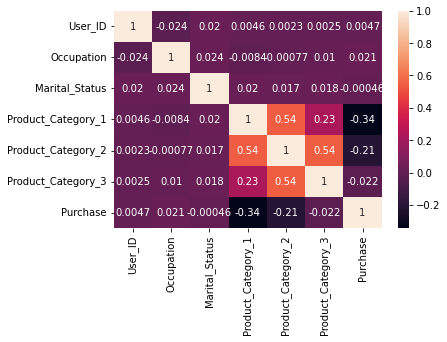

In [14]:
sns.heatmap(data.corr(),annot=True)
plt.show()

## Scaling

In [15]:
df = data.copy()

In [16]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['Gender'] = le.fit_transform(df['Gender'])

In [19]:
df['Age'] = le.fit_transform(df['Age'])

In [20]:
df['City_Category'] = le.fit_transform(df['City_Category'])

In [21]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')
df['Purchase'] =df['Purchase'].fillna(0).astype('int64')

In [22]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [23]:
df.isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

## Splitting the data

In [24]:
X = df.drop("Purchase",axis=1)

In [25]:
y=df['Purchase']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Model building

### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
lr.intercept_

67784026475382.086

In [30]:
lr.coef_

array([ 3.50529789e+02,  7.30909704e+01,  3.63021000e+00,  2.18253630e+02,
       -4.64894390e+01, -2.35100375e+02,  7.99861046e+00,  1.03013433e+02,
       -6.77840265e+13, -6.77840265e+13, -6.77840265e+13, -6.77840265e+13,
       -6.77840265e+13])

In [31]:
y_pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [33]:
mean_absolute_error(y_test, y_pred)

4761.700560610121

In [34]:
mean_absolute_error(y_test, y_pred)

4761.700560610121

In [35]:
r2_score(y_test, y_pred)

0.05011755680372498

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dt = DecisionTreeRegressor(random_state = 0) 

In [38]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
dt_y_pred = dt.predict(X_test)

In [40]:
mean_absolute_error(y_test, dt_y_pred)


4615.079017202154

In [41]:
mean_squared_error(y_test, dt_y_pred)

37585919.41447225

In [42]:
r2_score(y_test, dt_y_pred)

-0.05215541752762087

### XGBoost Regressor

In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
from xgboost.sklearn import XGBRegressor

In [45]:
xg_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=40,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:
xg_y_pred = xg_reg.predict(X_test)

In [48]:
mean_absolute_error(y_test, xg_y_pred)

4314.543028807602

In [50]:
mean_squared_error(y_test, xg_y_pred)

27938191.65427445

In [51]:
r2_score(y_test, xg_y_pred)

0.2179167049016948

In [55]:
from math import sqrt
print("RMSE of XGBoost Regression Model is ",sqrt(mean_squared_error(y_test, xg_y_pred)))

RMSE of XGBoost Regression Model is  5285.659055810775
